## 연립다세대

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

In [4]:
town_house = pd.read_csv('D:/SDC_project/townhouse.csv')
town_house

,NO,시군구,번지,본번,부번,건물명,전월세구분,전용면적(㎡),계약년월,계약일,...,건축년도,도로명,계약기간,계약구분,갱신요구권 사용,종전계약 보증금(만원),종전계약 월세(만원),주택유형,연도,월
0,70835,서울특별시 중랑구 상봉동,107-30,107,30,동일캐슬108동,전세,25.91,202306,23,...,2023,면목로92가길 4,202307~202507,신규,-,NaN,NaN,연립다세대,2023,6
1,70834,서울특별시 성북구 정릉동,394-1,394,1,삼성그린빌라,전세,29.61,202306,23,...,2018,보국문로11길 28-7,202307~202507,갱신,-,"21,000",0.0,연립다세대,2023,6
2,70828,서울특별시 중랑구 면목동,543-28,543,28,예인하우스,전세,17.54,202306,23,...,2023,면목로65길 27,202308~202508,신규,-,NaN,NaN,연립다세대,2023,6
3,70827,서울특별시 성북구 장위동,238-177,238,177,우림빌라,전세,59.64,202306,23,...,1991,장위로31길 16,202307~202507,신규,-,NaN,NaN,연립다세대,2023,6
4,70826,서울특별시 송파구 석촌동,218-10,218,10,(218-10),전세,40.80,202306,23,...,2002,삼학사로6길 13,202307~202507,갱신,-,"15,750",0.0,연립다세대,2023,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104664,26,서울특별시 용산구 효창동,127-10,127,10,127-10,전세,27.94,202412,31,...,2017,효창원로69가길 28,202503~202703,갱신,-,"23,100",0.0,연립다세대,2024,12
104665,24,서울특별시 용산구 이태원동,180-21,180,21,그린빌라,전세,91.71,202412,31,...,1994,보광로55길 15,202502~202702,신규,-,NaN,NaN,연립다세대,2024,12
104666,23,서울특별시 광진구 중곡동,231-5,231,5,그린나래,전세,30.00,202412,31,...,2022,면목로 119,202504~202703,갱신,-,"7,200",0.0,연립다세대,2024,12
104667,16,서울특별시 성동구 성수동2가,299-82,299,82,에덴빌,전세,14.04,202412,31,...,2014,광나루로4길 6,202502~202602,신규,-,NaN,NaN,연립다세대,2024,12


In [5]:
town_house['계약구분'].value_counts()

계약구분
신규    67109
갱신    28758
-      8802
Name: count, dtype: int64

In [6]:
town_house['종전계약 보증금(만원)'] = town_house['종전계약 보증금(만원)'].fillna(0)

In [7]:
town_house['계약구분'] = town_house['계약구분'].replace('-', '신규')
town_house['계약구분'].value_counts()

계약구분
신규    75911
갱신    28758
Name: count, dtype: int64

In [8]:
town_house = town_house[town_house['계약구분']=='신규']

In [9]:
town_house['구'] = town_house['시군구'].str.extract(r'(\S+구)')
town_house

C:\Users\emily\AppData\Local\Temp\ipykernel_3520\1475232886.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  town_house['구'] = town_house['시군구'].str.extract(r'(\S+구)')


,NO,시군구,번지,본번,부번,건물명,전월세구분,전용면적(㎡),계약년월,계약일,...,도로명,계약기간,계약구분,갱신요구권 사용,종전계약 보증금(만원),종전계약 월세(만원),주택유형,연도,월,구
0,70835,서울특별시 중랑구 상봉동,107-30,107,30,동일캐슬108동,전세,25.91,202306,23,...,면목로92가길 4,202307~202507,신규,-,0,NaN,연립다세대,2023,6,중랑구
2,70828,서울특별시 중랑구 면목동,543-28,543,28,예인하우스,전세,17.54,202306,23,...,면목로65길 27,202308~202508,신규,-,0,NaN,연립다세대,2023,6,중랑구
3,70827,서울특별시 성북구 장위동,238-177,238,177,우림빌라,전세,59.64,202306,23,...,장위로31길 16,202307~202507,신규,-,0,NaN,연립다세대,2023,6,성북구
5,70825,서울특별시 송파구 석촌동,164-1,164,1,(164-1),전세,19.69,202306,23,...,백제고분로37가길 25,-,신규,-,0,NaN,연립다세대,2023,6,송파구
6,70824,서울특별시 송파구 석촌동,229-16,229,16,(229-16),전세,45.76,202306,23,...,삼학사로6길 25,-,신규,-,0,NaN,연립다세대,2023,6,송파구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104659,72,서울특별시 은평구 녹번동,126-33,126,33,라임하우스,전세,29.49,202412,31,...,녹번로3가길 28-1,202503~202703,신규,-,0,NaN,연립다세대,2024,12,은평구
104662,51,서울특별시 동대문구 장안동,317-4,317,4,동성골드리버,전세,47.77,202412,31,...,장안벚꽃로3길 28,202502~202702,신규,-,0,NaN,연립다세대,2024,12,동대문구
104663,47,서울특별시 중랑구 면목동,616-33,616,33,행운빌딩,전세,18.20,202412,31,...,면목로42길 11,202502~202702,신규,-,0,NaN,연립다세대,2024,12,중랑구
104665,24,서울특별시 용산구 이태원동,180-21,180,21,그린빌라,전세,91.71,202412,31,...,보광로55길 15,202502~202702,신규,-,0,NaN,연립다세대,2024,12,용산구


In [10]:
town_house_count = town_house['구'].value_counts().reset_index(name='거래건수')
town_house_count

,구,거래건수
0,송파구,6466
1,강서구,5965
2,은평구,5393
3,마포구,4400
4,광진구,4199
5,강동구,4036
6,서초구,3967
7,용산구,3880
8,강남구,3620
9,양천구,3590


In [11]:
seoul_map = pd.read_excel('D:/SDC_project/map_visualization/서울시_행정동_좌표.xlsx')
seoul_map

,code,sido,gu,dong,lat,lng
0,1111051500,서울특별시,종로구,청운효자동,37.584009,126.970626
1,1111053000,서울특별시,종로구,사직동,37.575408,126.965944
2,1111054000,서울특별시,종로구,삼청동,37.590758,126.980996
3,1111055000,서울특별시,종로구,부암동,37.594768,126.965574
4,1111056000,서울특별시,종로구,평창동,37.613029,126.974485
...,...,...,...,...,...,...
886,1174010600,서울특별시,강동구,둔촌동,37.531157,127.142891
887,1174010700,서울특별시,강동구,암사동,37.552497,127.133010
888,1174010800,서울특별시,강동구,성내동,37.531338,127.129174
889,1174010900,서울특별시,강동구,천호동,37.543676,127.131748


In [12]:
seoul_map = seoul_map.rename(columns={'gu':'구','dong':'동','lat':'위도','lng':'경도'})
seoul_map

,code,sido,구,동,위도,경도
0,1111051500,서울특별시,종로구,청운효자동,37.584009,126.970626
1,1111053000,서울특별시,종로구,사직동,37.575408,126.965944
2,1111054000,서울특별시,종로구,삼청동,37.590758,126.980996
3,1111055000,서울특별시,종로구,부암동,37.594768,126.965574
4,1111056000,서울특별시,종로구,평창동,37.613029,126.974485
...,...,...,...,...,...,...
886,1174010600,서울특별시,강동구,둔촌동,37.531157,127.142891
887,1174010700,서울특별시,강동구,암사동,37.552497,127.133010
888,1174010800,서울특별시,강동구,성내동,37.531338,127.129174
889,1174010900,서울특별시,강동구,천호동,37.543676,127.131748


In [13]:
gu_coords_df = seoul_map[['구','위도','경도']]
combined_with_coords = pd.merge(town_house_count, gu_coords_df, on=['구'], how='left')
combined_with_coords

,구,거래건수,위도,경도
0,송파구,6466,37.538055,127.122215
1,송파구,6466,37.528779,127.116814
2,송파구,6466,37.496923,127.143302
3,송파구,6466,37.493534,127.146891
4,송파구,6466,37.496025,127.149894
...,...,...,...,...
886,중구,871,37.567411,126.968642
887,중구,871,37.558715,126.965840
888,중구,871,37.559382,126.969985
889,중구,871,37.556408,126.967319


In [14]:
combined_with_coords.to_csv('combined_coords_townhouse.csv')

In [15]:
import geopandas as gpd
import matplotlib.pyplot as plt

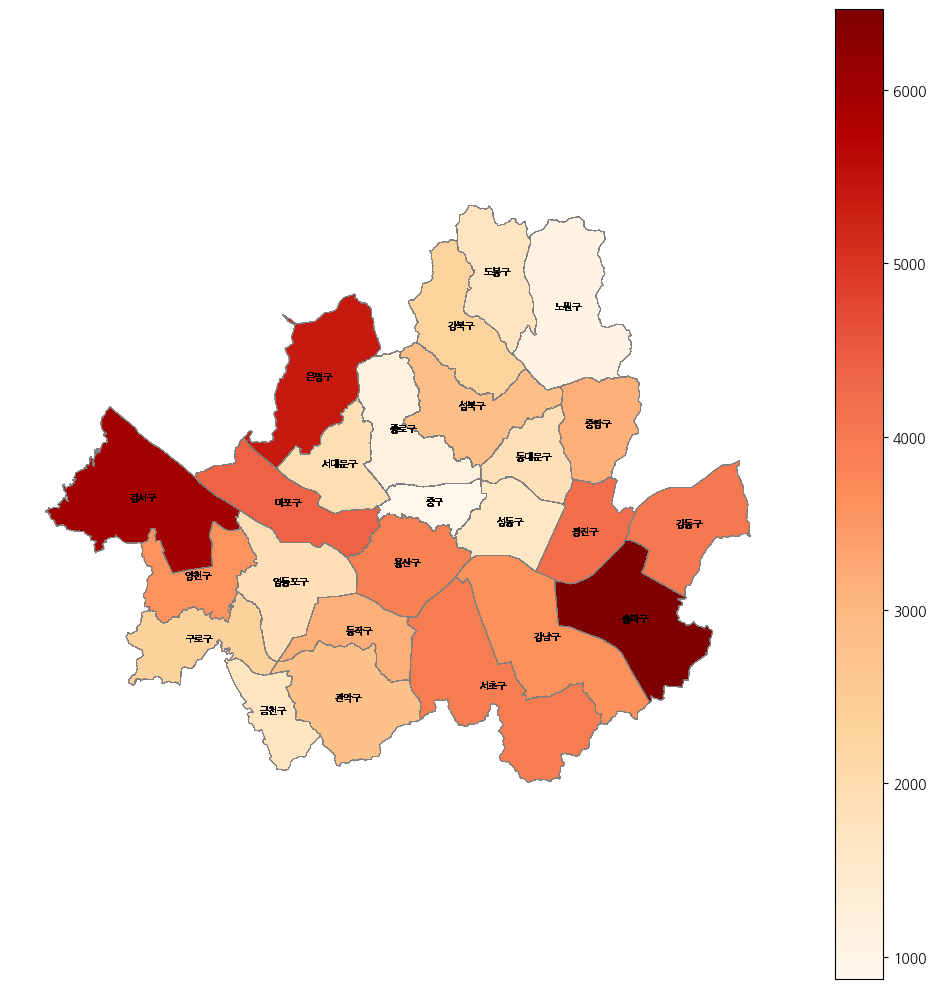

In [16]:
df = pd.read_csv('D:/SDC_project/map_visualization/combined_coords_townhouse.csv')  

# 2. 서울 구 경계 지도 불러오기
# shp 또는 geojson 파일 필요 (서울시 행정구역 경계)
seoul_gu = gpd.read_file('D:/SDC_project/map_visualization/sig_20230729/sig.shp',encoding="cp949") 
seoul_gu = seoul_gu[seoul_gu['SIG_CD'].str.startswith('11')]

merged = seoul_gu.merge(df, left_on='SIG_KOR_NM', right_on='구')  

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
merged.boundary.plot(ax=ax, color='gray', linewidth=0.3) 
merged.plot(column='거래건수', ax=ax, legend=True, cmap='OrRd', edgecolor='white', linewidth=0.3)

for idx, row in merged.iterrows():
    plt.text(row.geometry.centroid.x, row.geometry.centroid.y, row['구'],
             ha='center', fontsize=7, color='black')

plt.axis('off')
plt.tight_layout()
# plt.savefig('seoul_townhouse_by_gu_clean.png', dpi=300, bbox_inches='tight')
plt.show()

## 단독 다가구

In [17]:
multi_household = pd.read_csv('D:/SDC_project/단독다가구_전세가율.csv')
multi_household

,시군구,구,동,전용면적(㎡),계약년월,계약일,전세금,건축년도,도로명,계약기간,...,주택유형,계약시기,전세전환_갱신,계약개월수,is_계약개월수_missing,is_갱신요구권_사용_originally_missing,is_건축년도_missing,평균전세금,평균매매가,전세가율
0,서울특별시 성동구 행당동,성동구,행당동,42.00,202412,31,14000,1998.0,마조로1길,202501~202701,...,단독다가구,2024-12-31,0,24.0,0,0,0,14841.115590,264108.650000,5.619322
1,서울특별시 용산구 서계동,용산구,서계동,26.45,202412,31,3000,1944.0,효창원로104라길,202501~202701,...,단독다가구,2024-12-31,0,24.0,0,0,0,17021.573626,278563.327225,6.110486
2,서울특별시 용산구 용산동2가,용산구,용산동2가,61.17,202412,31,25000,1994.0,신흥로25가길,202502~202702,...,단독다가구,2024-12-31,0,24.0,0,0,0,17021.573626,278563.327225,6.110486
3,서울특별시 광진구 중곡동,광진구,중곡동,40.80,202412,31,11000,1990.0,능동로43길,202502~202702,...,단독다가구,2024-12-31,0,24.0,0,0,0,15908.326611,187054.953390,8.504627
4,서울특별시 성동구 성수동2가,성동구,성수동2가,50.00,202412,31,16000,1995.0,성덕정길,202502~202702,...,단독다가구,2024-12-31,0,24.0,0,0,0,14841.115590,264108.650000,5.619322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53728,서울특별시 송파구 마천동,송파구,마천동,18.75,202306,1,2000,1985.0,성내천로29다길,-,...,단독다가구,2023-06-01,0,24.0,0,0,0,16565.338401,256582.105769,6.456155
53729,서울특별시 송파구 방이동,송파구,방이동,43.00,202306,1,24000,2019.0,NaN,-,...,단독다가구,2023-06-01,0,24.0,0,0,0,16565.338401,256582.105769,6.456155
53730,서울특별시 송파구 방이동,송파구,방이동,43.00,202306,1,24000,2019.0,백제고분로48길,202307~202507,...,단독다가구,2023-06-01,0,24.0,0,0,0,16565.338401,256582.105769,6.456155
53731,서울특별시 송파구 방이동,송파구,방이동,43.00,202306,1,14000,1996.0,위례성대로2길,202309~202509,...,단독다가구,2023-06-01,0,24.0,0,0,0,16565.338401,256582.105769,6.456155


In [18]:
multi_household_count = multi_household.groupby('구')['동'].value_counts().reset_index(name='거래건수')
multi_household_count

,구,동,거래건수
0,강남구,역삼동,551
1,강남구,논현동,404
2,강남구,대치동,277
3,강남구,삼성동,180
4,강남구,일원동,180
...,...,...,...
328,중랑구,망우동,575
329,중랑구,중화동,485
330,중랑구,묵동,447
331,중랑구,상봉동,333


In [19]:
gu_coords_df = seoul_map[['구','동','위도','경도']]
combined_with_coords = pd.merge(multi_household_count, gu_coords_df, on=['구','동'], how='left')
combined_with_coords

,구,동,거래건수,위도,경도
0,강남구,역삼동,551,37.500335,127.037596
1,강남구,논현동,404,37.513093,127.031353
2,강남구,대치동,277,37.501711,127.057851
3,강남구,삼성동,180,37.512792,127.053085
4,강남구,일원동,180,37.491326,127.083799
...,...,...,...,...,...
407,중랑구,망우동,575,37.596678,127.100419
408,중랑구,중화동,485,37.599750,127.077718
409,중랑구,묵동,447,37.611266,127.077829
410,중랑구,상봉동,333,37.596267,127.085704


In [20]:
combined_with_coords.to_csv('combined_coords_multi_household.csv')

In [21]:
import geopandas as gpd
import matplotlib.pyplot as plt

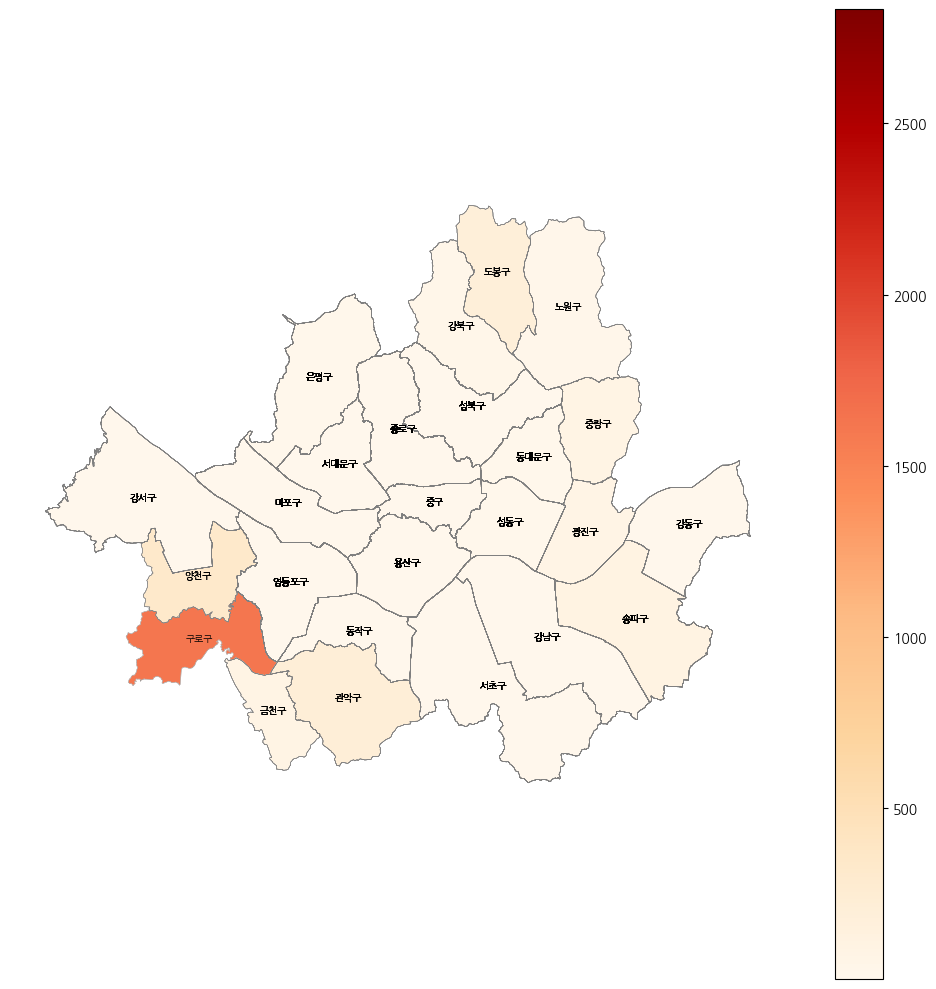

In [22]:
df = pd.read_csv('D:/SDC_project/map_visualization/combined_coords_multi_household.csv')  

# 2. 서울 구 경계 지도 불러오기
# shp 또는 geojson 파일 필요 (서울시 행정구역 경계)
seoul_gu = gpd.read_file('D:/SDC_project/map_visualization/sig_20230729/sig.shp',encoding="cp949") 
seoul_gu = seoul_gu[seoul_gu['SIG_CD'].str.startswith('11')]

merged = seoul_gu.merge(df, left_on='SIG_KOR_NM', right_on='구')  

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
merged.boundary.plot(ax=ax, color='gray', linewidth=0.3) 
merged.plot(column='거래건수', ax=ax, legend=True, cmap='OrRd', edgecolor='white', linewidth=0.3)

for idx, row in merged.iterrows():
    plt.text(row.geometry.centroid.x, row.geometry.centroid.y, row['구'],
             ha='center', fontsize=7, color='black')

plt.axis('off')
plt.tight_layout()
# plt.savefig('seoul_townhouse_by_gu_clean.png', dpi=300, bbox_inches='tight')
plt.show()

In [23]:
df

,Unnamed: 0,구,동,거래건수,위도,경도
0,0,강남구,역삼동,551,37.500335,127.037596
1,1,강남구,논현동,404,37.513093,127.031353
2,2,강남구,대치동,277,37.501711,127.057851
3,3,강남구,삼성동,180,37.512792,127.053085
4,4,강남구,일원동,180,37.491326,127.083799
...,...,...,...,...,...,...
407,407,중랑구,망우동,575,37.596678,127.100419
408,408,중랑구,중화동,485,37.599750,127.077718
409,409,중랑구,묵동,447,37.611266,127.077829
410,410,중랑구,상봉동,333,37.596267,127.085704


In [24]:
merged

,SIG_CD,SIG_ENG_NM,SIG_KOR_NM,geometry,Unnamed: 0,구,동,거래건수,위도,경도
0,11110,Jongno-gu,종로구,"POLYGON ((956615.453 1953567.199, 956621.579 1...",336,종로구,명륜3가,107,37.588359,126.994739
1,11110,Jongno-gu,종로구,"POLYGON ((956615.453 1953567.199, 956621.579 1...",337,종로구,창신동,107,37.574729,127.012062
2,11110,Jongno-gu,종로구,"POLYGON ((956615.453 1953567.199, 956621.579 1...",338,종로구,숭인동,86,37.575979,127.018802
3,11110,Jongno-gu,종로구,"POLYGON ((956615.453 1953567.199, 956621.579 1...",339,종로구,혜화동,62,37.587817,127.001745
4,11110,Jongno-gu,종로구,"POLYGON ((956615.453 1953567.199, 956621.579 1...",340,종로구,혜화동,62,37.587955,127.001157
...,...,...,...,...,...,...,...,...,...,...
407,11740,Gangdong-gu,강동구,"POLYGON ((971595.075 1952405.815, 971596.036 1...",24,강동구,명일동,87,37.549276,127.147555
408,11740,Gangdong-gu,강동구,"POLYGON ((971595.075 1952405.815, 971596.036 1...",25,강동구,상일동,63,37.550583,127.168797
409,11740,Gangdong-gu,강동구,"POLYGON ((971595.075 1952405.815, 971596.036 1...",26,강동구,상일동,63,37.548220,127.170630
410,11740,Gangdong-gu,강동구,"POLYGON ((971595.075 1952405.815, 971596.036 1...",27,강동구,강일동,4,37.567438,127.173364


In [25]:
df.isnull().sum()

Unnamed: 0    0
구             0
동             0
거래건수          0
위도            1
경도            1
dtype: int64

In [26]:
gu_coords_df = seoul_map[['구','동','위도','경도']]
combined_with_coords = pd.merge(multi_household_count, gu_coords_df, on=['구','동'], how='left')
combined_with_coords

,구,동,거래건수,위도,경도
0,강남구,역삼동,551,37.500335,127.037596
1,강남구,논현동,404,37.513093,127.031353
2,강남구,대치동,277,37.501711,127.057851
3,강남구,삼성동,180,37.512792,127.053085
4,강남구,일원동,180,37.491326,127.083799
...,...,...,...,...,...
407,중랑구,망우동,575,37.596678,127.100419
408,중랑구,중화동,485,37.599750,127.077718
409,중랑구,묵동,447,37.611266,127.077829
410,중랑구,상봉동,333,37.596267,127.085704


In [ ]:
# import folium

# # 서울 중심 위치로 지도 생성
# m = folium.Map(location=[37.5665, 126.9780], zoom_start=11)

# # 각 동별 CircleMarker 생성
# for _, row in df.iterrows():
#     folium.CircleMarker(
#         location=[row['위도'], row['경도']],
#         radius=max(row['거래건수'] / 10, 3),  # 값에 따라 크기 조절, 최소 크기 설정
#         color='crimson',
#         fill=True,
#         fill_opacity=0.7,
#         popup=folium.Popup(f"{row['구']} {row['동']}<br>거래건수: {row['거래건수']}", max_width=200)
#     ).add_to(m)

# # 지도 저장 또는 바로 보기
# m.save('seoul_dong_transactions.html')

ValueError: Location values cannot contain NaNs.

In [28]:
print(df[df['위도'].isna() | df['경도'].isna()])

    Unnamed: 0    구   동  거래건수  위도  경도
62          62  구로구  로구  1622 NaN NaN


In [ ]:
df[df['동']=='로구']

,Unnamed: 0,구,동,거래건수,위도,경도
62,62,구로구,로구,1622,NaN,NaN


## 아파트

In [29]:
apt = pd.read_csv('D:/SDC_project/아파트_전세가율.csv')
apt

,Unnamed: 0,시군구,구,동,전용면적(㎡),계약년월,계약일,전세금,건축년도,도로명,...,주택유형,계약시기,전세전환_갱신,계약개월수,is_계약개월수_missing,is_갱신요구권_사용_originally_missing,is_건축년도_missing,평균전세금,평균매매가,전세가율
0,0,서울특별시 중구 신당동,중구,신당동,84.88,202312,31,60000,1999,동호로10길 30,...,아파트,2023-12-31,0,24.0,0,0,0,58301.087987,103842.130081,56.143964
1,1,서울특별시 용산구 이촌동,용산구,이촌동,59.22,202312,31,40000,1994,이촌로2가길 122,...,아파트,2023-12-31,0,24.0,0,0,0,76988.458087,224774.876011,34.251363
2,2,서울특별시 용산구 효창동,용산구,효창동,59.41,202312,31,67000,2010,백범로 260,...,아파트,2023-12-31,0,24.0,0,0,0,76988.458087,224774.876011,34.251363
3,3,서울특별시 용산구 효창동,용산구,효창동,59.41,202312,31,67000,2010,백범로 260,...,아파트,2023-12-31,0,24.0,0,0,0,76988.458087,224774.876011,34.251363
4,4,서울특별시 성동구 금호동2가,성동구,금호동2가,59.98,202312,31,66150,2016,금호로 173,...,아파트,2023-12-31,0,24.0,0,0,0,67093.077668,140679.421891,47.692176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221511,237179,서울특별시 영등포구 여의도동,영등포구,여의도동,93.06,202401,1,40000,1976,여의대로6길 17,...,아파트,2024-01-01,0,24.0,0,0,0,54035.782343,114898.179985,47.029276
221512,237180,서울특별시 성동구 하왕십리동,성동구,하왕십리동,51.94,202401,1,50000,2017,난계로 100,...,아파트,2024-01-01,0,24.0,0,0,0,67093.077668,140679.421891,47.692176
221513,237181,서울특별시 서대문구 북아현동,서대문구,북아현동,59.96,202401,1,40000,1999,이화여대8길 62,...,아파트,2024-01-01,1,12.0,0,0,0,52269.342928,89096.850920,58.665758
221514,237182,서울특별시 송파구 장지동,송파구,장지동,84.98,202401,1,69000,2008,충민로6길 14,...,아파트,2024-01-01,0,24.0,0,0,0,68957.339773,164799.188818,41.843252


In [30]:
apt_count = apt.groupby('구')['동'].value_counts().reset_index(name='거래건수')
apt_count

,구,동,거래건수
0,강남구,개포동,4251
1,강남구,대치동,3046
2,강남구,도곡동,2078
3,강남구,역삼동,1761
4,강남구,일원동,1479
...,...,...,...
321,중랑구,면목동,1187
322,중랑구,상봉동,834
323,중랑구,묵동,725
324,중랑구,망우동,714


In [31]:
apt_gu = apt['구'].value_counts().reset_index(name='거래건수')
apt_gu

,구,거래건수
0,강남구,19647
1,송파구,18574
2,노원구,18028
3,강동구,14232
4,서초구,13840
5,강서구,13608
6,양천구,11648
7,영등포구,10263
8,마포구,9683
9,성동구,9051


In [32]:
gu_coords_apt = seoul_map[['구','동','위도','경도']]
combined_coords_apt = pd.merge(apt_count, gu_coords_apt, on=['구','동'], how='left')
combined_coords_apt

,구,동,거래건수,위도,경도
0,강남구,개포동,4251,37.478260,127.052024
1,강남구,대치동,3046,37.501711,127.057851
2,강남구,도곡동,2078,37.486509,127.040738
3,강남구,역삼동,1761,37.500335,127.037596
4,강남구,일원동,1479,37.491326,127.083799
...,...,...,...,...,...
400,중랑구,면목동,1187,37.584420,127.086487
401,중랑구,상봉동,834,37.596267,127.085704
402,중랑구,묵동,725,37.611266,127.077829
403,중랑구,망우동,714,37.596678,127.100419


In [33]:
gu_coords_apt = seoul_map[['구','위도','경도']]
combined_coords_apt_gu = pd.merge(apt_gu, gu_coords_apt, on=['구'], how='left')
combined_coords_apt_gu

,구,거래건수,위도,경도
0,강남구,19647,37.523807,127.026492
1,강남구,19647,37.511498,127.028552
2,강남구,19647,37.517353,127.037164
3,강남구,19647,37.530734,127.028461
4,강남구,19647,37.524399,127.050457
...,...,...,...,...
886,종로구,1594,37.610420,126.969837
887,종로구,1594,37.594148,126.964248
888,종로구,1594,37.600310,126.957773
889,종로구,1594,37.602696,126.961378


In [34]:
combined_coords_apt_gu.to_csv('combined_coords_apt_gu.csv')

In [35]:
combined_coords_apt.sort_values(by='거래건수',ascending=False)

,구,동,거래건수,위도,경도
79,노원구,상계동,7724,37.667100,127.072189
248,양천구,신정동,5765,37.521636,126.857957
0,강남구,개포동,4251,37.478260,127.052024
80,노원구,중계동,3980,37.646989,127.082411
249,양천구,목동,3870,37.539776,126.869079
...,...,...,...,...,...
146,마포구,구수동,1,37.545679,126.932695
230,성북구,성북동1가,1,37.589374,127.003652
369,종로구,신문로1가,1,37.570366,126.973968
371,종로구,이화동,1,37.577245,127.005622


In [36]:
combined_coords_apt.to_csv('combined_coords_apt.csv')

In [ ]:
df

,Unnamed: 0,구,동,거래건수,위도,경도
0,0,강남구,개포동,4251,37.478260,127.052024
1,1,강남구,대치동,3046,37.501711,127.057851
2,2,강남구,도곡동,2078,37.486509,127.040738
3,3,강남구,역삼동,1761,37.500335,127.037596
4,4,강남구,일원동,1479,37.491326,127.083799
...,...,...,...,...,...,...
400,400,중랑구,면목동,1187,37.584420,127.086487
401,401,중랑구,상봉동,834,37.596267,127.085704
402,402,중랑구,묵동,725,37.611266,127.077829
403,403,중랑구,망우동,714,37.596678,127.100419


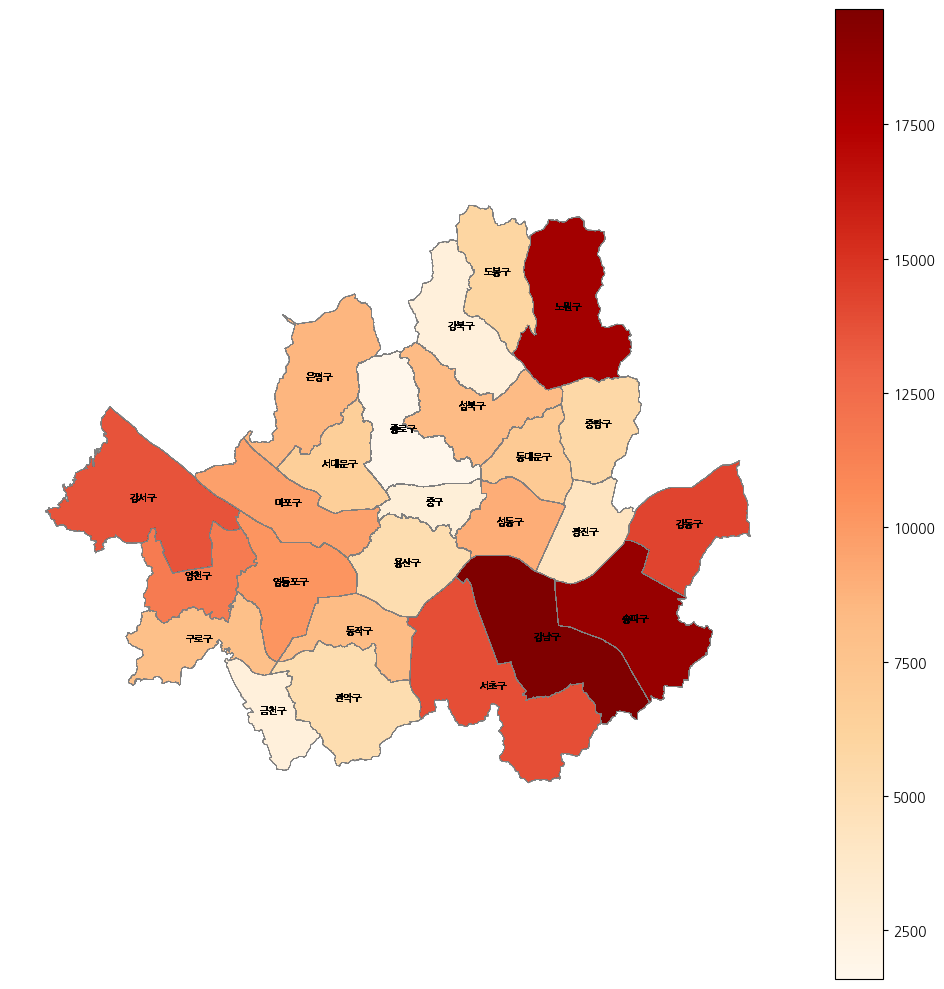

In [38]:
df_gu = pd.read_csv('D:/SDC_project/map_visualization/combined_coords_apt_gu.csv')  

# 2. 서울 구 경계 지도 불러오기
# shp 또는 geojson 파일 필요 (서울시 행정구역 경계)
seoul_gu = gpd.read_file('D:/SDC_project/map_visualization/sig_20230729/sig.shp',encoding="cp949") 
seoul_gu = seoul_gu[seoul_gu['SIG_CD'].str.startswith('11')]

merged = seoul_gu.merge(df_gu, left_on='SIG_KOR_NM', right_on='구')  

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
merged.boundary.plot(ax=ax, color='gray', linewidth=0.3) 
merged.plot(column='거래건수', ax=ax, legend=True, cmap='OrRd', edgecolor='white', linewidth=0.3)

for idx, row in merged.iterrows():
    plt.text(row.geometry.centroid.x, row.geometry.centroid.y, row['구'],
             ha='center', fontsize=7, color='black')

plt.axis('off')
plt.tight_layout()
# plt.savefig('seoul_townhouse_by_gu_clean.png', dpi=300, bbox_inches='tight')
plt.show()

In [39]:
seoul_dong = gpd.read_file('D:/SDC_project/map_visualization/emd_20230729/emd.shp',encoding="cp949") 
seoul_dong 

,EMD_CD,EMD_ENG_NM,EMD_KOR_NM,geometry
0,11110101,Cheongun-dong,청운동,"POLYGON ((953700.022 1954605.065, 953693.871 1..."
1,11110102,Singyo-dong,신교동,"POLYGON ((953233.465 1953996.984, 953235.183 1..."
2,11110103,Gungjeong-dong,궁정동,"POLYGON ((953560.228 1954257.466, 953561.19 19..."
3,11110104,Hyoja-dong,효자동,"POLYGON ((953519.843 1953890.785, 953518.489 1..."
4,11110105,Changseong-dong,창성동,"POLYGON ((953516.123 1953734.362, 953516.526 1..."
...,...,...,...,...
5060,51830310,Seo-myeon,서면,"POLYGON ((1079287.552 2011045.57, 1079356.15 2..."
5061,51830320,Sonyang-myeon,손양면,"MULTIPOLYGON (((1102997.769 2009910.288, 11029..."
5062,51830330,Hyeonbuk-myeon,현북면,"MULTIPOLYGON (((1108475.024 2002913.557, 11084..."
5063,51830340,Hyeonnam-myeon,현남면,"MULTIPOLYGON (((1114466.017 1992227.421, 11145..."


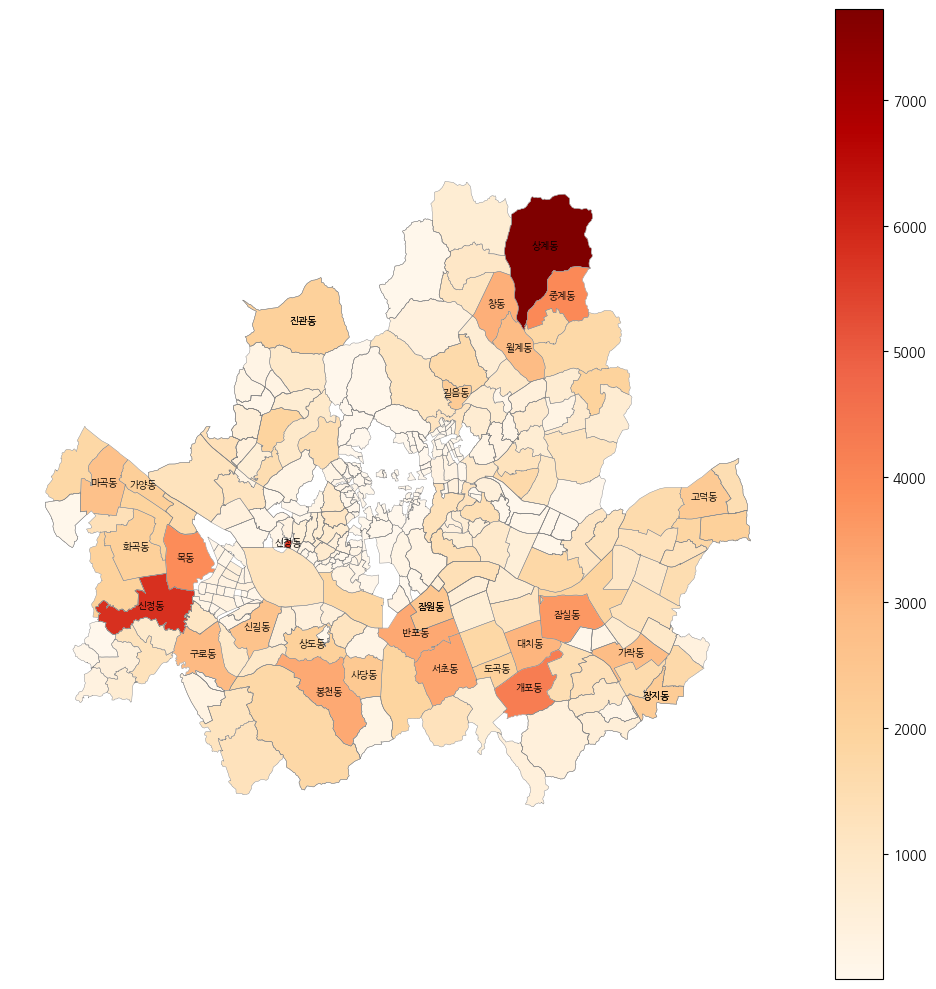

In [40]:
df = pd.read_csv('D:/SDC_project/map_visualization/combined_coords_apt.csv')  

# 2. 서울 구 경계 지도 불러오기
# shp 또는 geojson 파일 필요 (서울시 행정구역 경계)
seoul_dong = gpd.read_file('D:/SDC_project/map_visualization/emd_20230729/emd.shp',encoding="cp949") 
seoul_dong = seoul_dong[seoul_dong['EMD_CD'].str.startswith('11')]

merged = seoul_dong.merge(df, left_on='EMD_KOR_NM', right_on='동')  

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
merged.boundary.plot(ax=ax, color='gray', linewidth=0.3) 
merged.plot(column='거래건수', ax=ax, legend=True, cmap='OrRd', edgecolor='white', linewidth=0.3)

top = merged.sort_values('거래건수', ascending=False).head(30)
for idx, row in top.iterrows():
    plt.text(row.geometry.centroid.x, row.geometry.centroid.y, row['동'],
             ha='center', fontsize=7, color='black')

plt.axis('off')
plt.tight_layout()
# plt.savefig('seoul_townhouse_by_gu_clean.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
import folium

# 서울 중심 위치로 지도 생성
m = folium.Map(location=[37.5665, 126.9780], zoom_start=11)

# 각 동별 CircleMarker 생성
for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row['위도'], row['경도']],
        radius=max(row['거래건수'] / 10, 3),  # 값에 따라 크기 조절, 최소 크기 설정
        color='crimson',
        fill=True,
        fill_opacity=0.7,
        popup=folium.Popup(f"{row['구']} {row['동']}<br>거래건수: {row['거래건수']}", max_width=200)
    ).add_to(m)

# 지도 저장 또는 바로 보기
m.save('seoul_dong_transactions.html')

## 위험 스코어 지도 시각화

In [64]:
risk_score = pd.read_csv('D:/SDC_project/map_visualization/dong_위험스코어.csv')
risk_score

,동,위험스코어
0,동소문동2가,3.806067
1,동소문동1가,1.493815
2,삼선동5가,1.152204
3,안암동3가,1.127049
4,성북동,0.751585
5,안암동5가,0.679961
6,하계동,0.545379
7,흑석동,0.483135
8,상계동,0.473801
9,보문동6가,0.453628


In [65]:
apt_dong = apt[['구', '동']].drop_duplicates()
risk_score = pd.merge(risk_score, apt_dong, on='동', how='left')

In [67]:
risk_score.sort_values(by='위험스코어',ascending=False)

,동,위험스코어,구
0,동소문동2가,3.806067,NaN
1,동소문동1가,1.493815,NaN
2,삼선동5가,1.152204,NaN
3,안암동3가,1.127049,성북구
4,성북동,0.751585,성북구
5,안암동5가,0.679961,NaN
6,하계동,0.545379,노원구
7,흑석동,0.483135,동작구
8,상계동,0.473801,노원구
9,보문동6가,0.453628,성북구


In [76]:
risk_score.fillna('성북구')

,동,위험스코어,구
0,동소문동2가,3.806067,성북구
1,동소문동1가,1.493815,성북구
2,삼선동5가,1.152204,성북구
3,안암동3가,1.127049,성북구
4,성북동,0.751585,성북구
5,안암동5가,0.679961,성북구
6,하계동,0.545379,노원구
7,흑석동,0.483135,동작구
8,상계동,0.473801,노원구
9,보문동6가,0.453628,성북구


In [78]:
!pip install adjustText

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for adjustText from https://files.pythonhosted.org/packages/53/1c/8feedd607cc14c5df9aef74fe3af9a99bf660743b842a9b5b1865326b4aa/adjustText-1.3.0-py3-none-any.whl.metadata


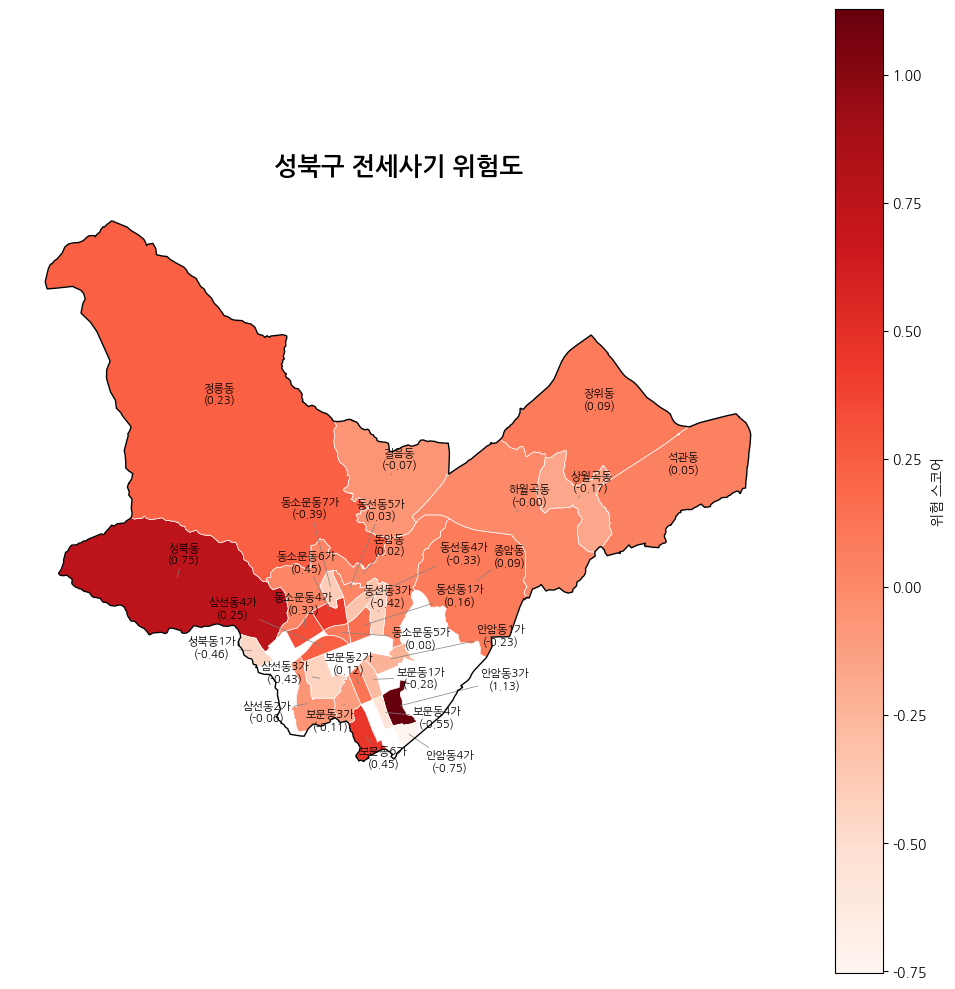

In [80]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from adjustText import adjust_text

# 2. 동/구 경계 불러오기
seoul_dong = gpd.read_file('D:/SDC_project/map_visualization/emd_20230729/emd.shp', encoding='cp949')
seoul_gu = gpd.read_file('D:/SDC_project/map_visualization/sig_20230729/sig.shp', encoding='cp949')

# 3. 서울시 데이터 필터링 및 '동' 데이터와 위험스코어 결합
seoul_dong_geo = seoul_dong[seoul_dong['EMD_CD'].str.startswith('11')]
seoul_gu_geo = seoul_gu[seoul_gu['SIG_CD'].str.startswith('11')]

# '동' 이름으로 데이터 결합
merged_gdf = seoul_dong_geo.merge(risk_score, left_on='EMD_KOR_NM', right_on='동')


# 4. '성북구' 데이터만 선택
target_gu_name = '성북구'

# 성북구 경계선 데이터
seongbuk_gu_boundary = seoul_gu_geo[seoul_gu_geo['SIG_KOR_NM'] == target_gu_name]

# 성북구 내의 '동' 데이터 (위험스코어 포함)
seongbuk_dongs_data = merged_gdf[merged_gdf['구'] == target_gu_name]


# 5. 시각화
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# 성북구 내의 동들을 위험스코어에 따라 채색
# 만약 risk_score 데이터에 없는 동이 있다면 'lightgrey'로 표시됨
seongbuk_dongs_data.plot(
    column='위험스코어',
    ax=ax,
    cmap='Reds',
    legend=True,
    edgecolor='white',
    linewidth=0.5,
    missing_kwds={
        "color": "lightgrey",
        "label": "데이터 없음"
    },
    legend_kwds={'label': "위험 스코어"}
)

# 성북구 외곽선 강조
seongbuk_gu_boundary.boundary.plot(ax=ax, color='black', linewidth=1)

# 2. 텍스트 객체를 담을 빈 리스트 생성
texts = []

# 3. 라벨 추가 로직 수정
for idx, row in seongbuk_dongs_data.iterrows():
    centroid = row.geometry.centroid
    # plt.text 대신 texts 리스트에 텍스트 객체를 추가
    texts.append(
        plt.text(
            centroid.x, centroid.y,
            f"{row['동']}\n({row['위험스코어']:.2f})",
            ha='center',
            fontsize=8, # 폰트 크기를 조금 줄이면 더 효과적입니다.
            fontweight='medium'
        )
    )

# 4. adjust_text를 호출하여 라벨 위치 자동 조정
adjust_text(texts, 
            arrowprops=dict(arrowstyle='-', color='gray', lw=0.5),
            ax=ax) # ax를 지정해주어야 해당 축에 맞게 조정됩니다.

ax.set_title(f'{target_gu_name} 전세사기 위험도', fontsize=18, fontweight='semibold', pad=15)
ax.set_axis_off() # 축 정보 숨기기
plt.tight_layout()
plt.show()

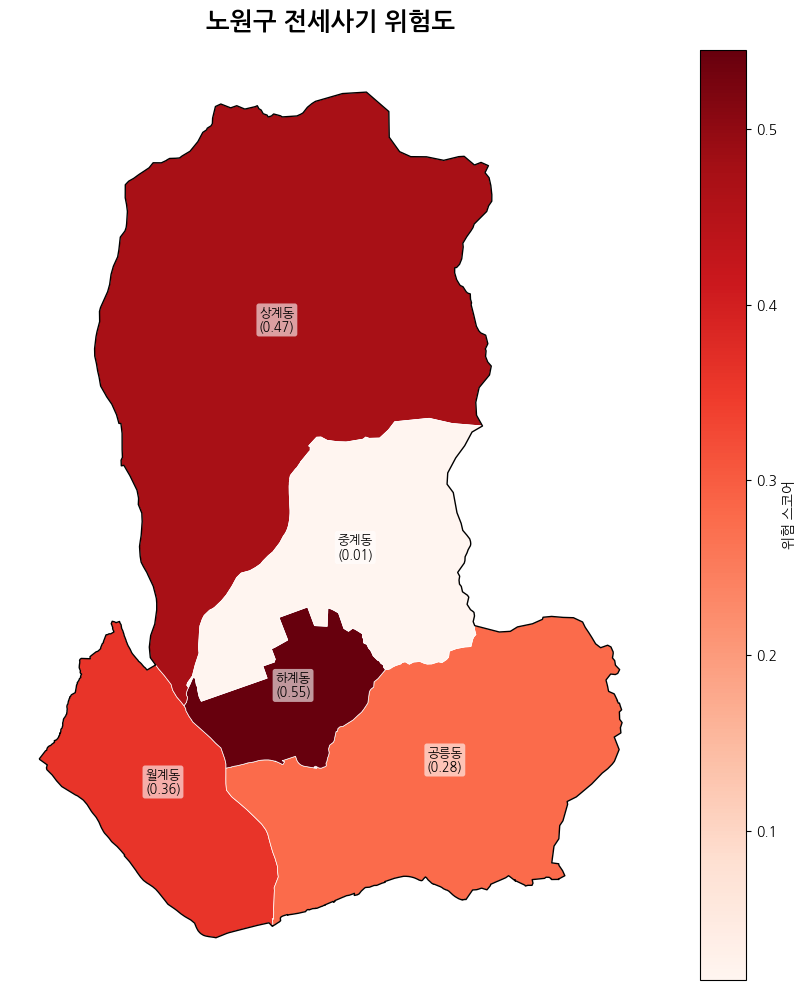

In [72]:
target_gu_name = '노원구'

# 성북구 경계선 데이터
seongbuk_gu_boundary = seoul_gu_geo[seoul_gu_geo['SIG_KOR_NM'] == target_gu_name]

# 성북구 내의 '동' 데이터 (위험스코어 포함)
seongbuk_dongs_data = merged_gdf[merged_gdf['구'] == target_gu_name]


# 5. 시각화
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# 성북구 내의 동들을 위험스코어에 따라 채색
# 만약 risk_score 데이터에 없는 동이 있다면 'lightgrey'로 표시됨
seongbuk_dongs_data.plot(
    column='위험스코어',
    ax=ax,
    cmap='Reds',
    legend=True,
    edgecolor='white',
    linewidth=0.5,
    missing_kwds={
        "color": "lightgrey",
        "label": "데이터 없음"
    },
    legend_kwds={'label': "위험 스코어"}
)

# 성북구 외곽선 강조
seongbuk_gu_boundary.boundary.plot(ax=ax, color='black', linewidth=1)

# 각 동에 텍스트 라벨 추가
for idx, row in seongbuk_dongs_data.iterrows():
    centroid = row.geometry.centroid
    plt.text(
        centroid.x, centroid.y,
        f"{row['동']}\n({row['위험스코어']:.2f})",
        ha='center',
        fontsize=9,
        fontweight='medium',
        bbox=dict(facecolor='white', alpha=0.6, edgecolor='none', boxstyle='round,pad=0.2')
    )

ax.set_title(f'{target_gu_name} 전세사기 위험도', fontsize=18, fontweight='semibold', pad=15)
ax.set_axis_off() # 축 정보 숨기기
plt.tight_layout()
plt.show()

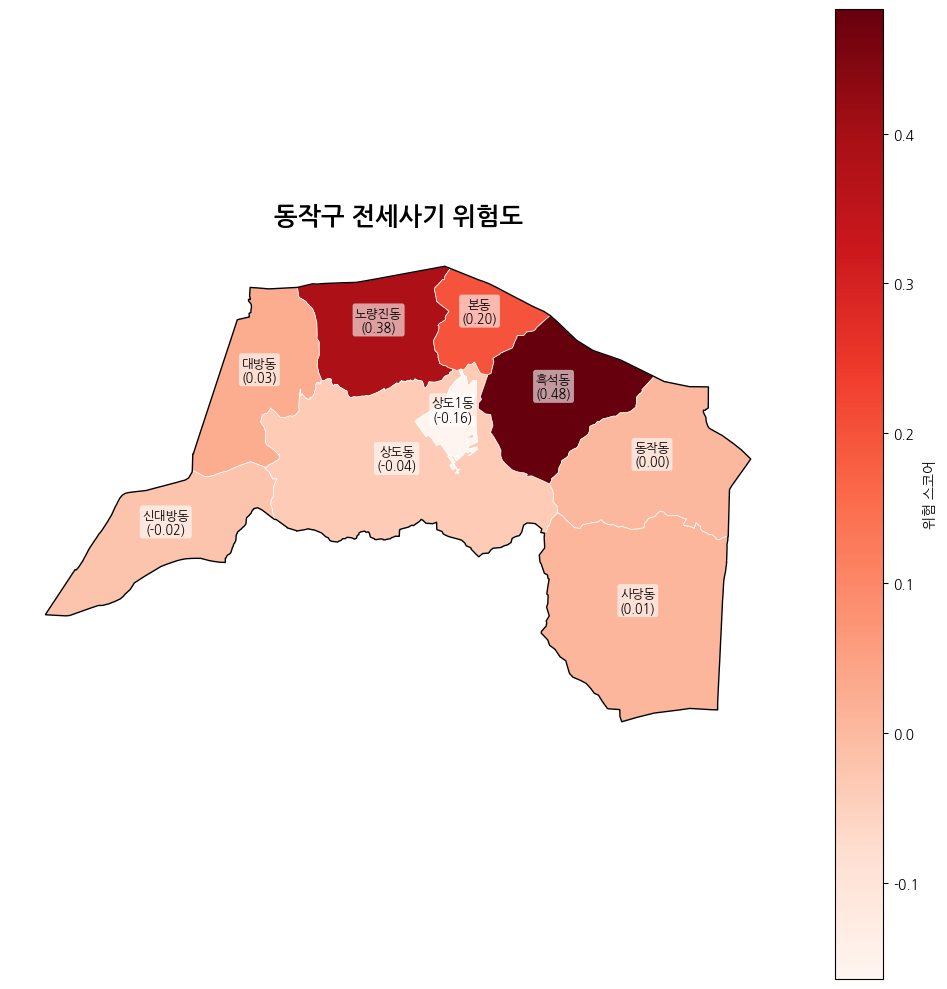

In [74]:
target_gu_name = '동작구'

# 성북구 경계선 데이터
seongbuk_gu_boundary = seoul_gu_geo[seoul_gu_geo['SIG_KOR_NM'] == target_gu_name]

# 성북구 내의 '동' 데이터 (위험스코어 포함)
seongbuk_dongs_data = merged_gdf[merged_gdf['구'] == target_gu_name]


# 5. 시각화
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# 성북구 내의 동들을 위험스코어에 따라 채색
# 만약 risk_score 데이터에 없는 동이 있다면 'lightgrey'로 표시됨
seongbuk_dongs_data.plot(
    column='위험스코어',
    ax=ax,
    cmap='Reds',
    legend=True,
    edgecolor='white',
    linewidth=0.5,
    missing_kwds={
        "color": "lightgrey",
        "label": "데이터 없음"
    },
    legend_kwds={'label': "위험 스코어"}
)

# 성북구 외곽선 강조
seongbuk_gu_boundary.boundary.plot(ax=ax, color='black', linewidth=1)

# 각 동에 텍스트 라벨 추가
for idx, row in seongbuk_dongs_data.iterrows():
    centroid = row.geometry.centroid
    plt.text(
        centroid.x, centroid.y,
        f"{row['동']}\n({row['위험스코어']:.2f})",
        ha='center',
        fontsize=9,
        fontweight='medium',
        bbox=dict(facecolor='white', alpha=0.6, edgecolor='none', boxstyle='round,pad=0.2')
    )

ax.set_title(f'{target_gu_name} 전세사기 위험도', fontsize=18, fontweight='semibold', pad=15)
ax.set_axis_off() # 축 정보 숨기기
plt.tight_layout()
plt.show()

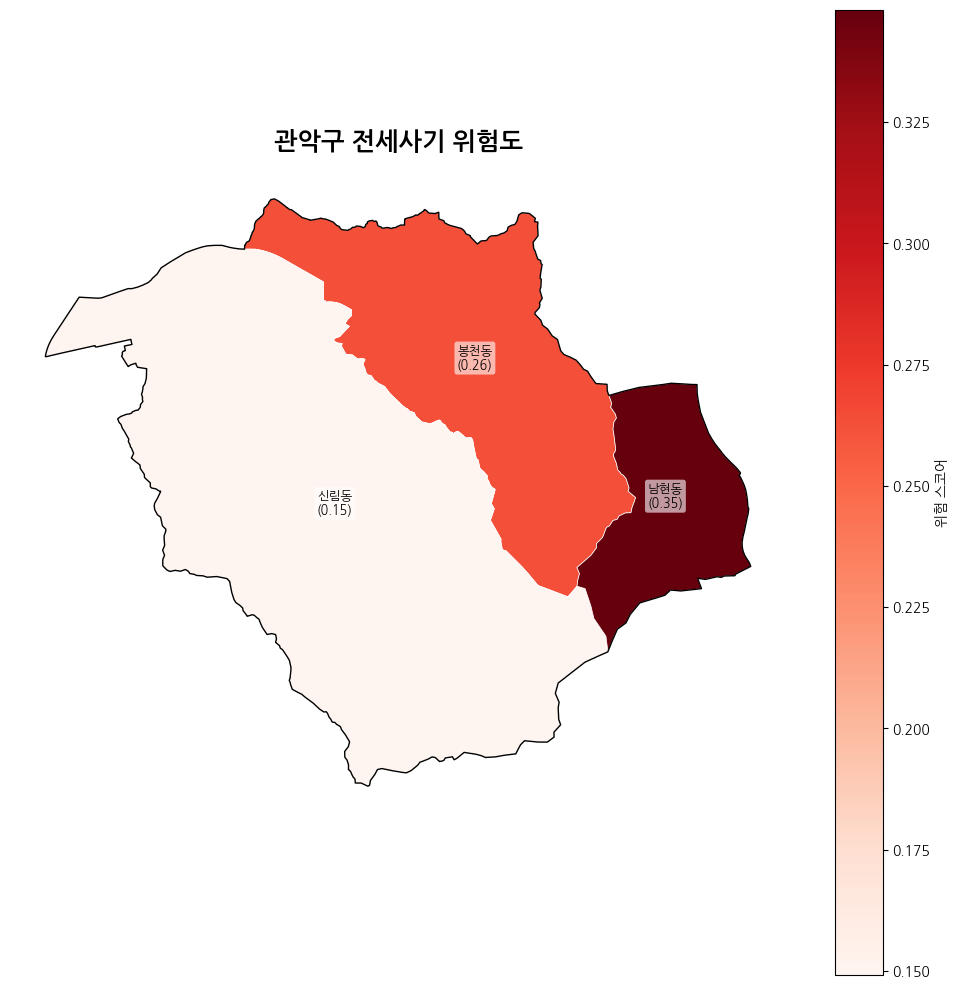

In [71]:
target_gu_name = '관악구'

# 성북구 경계선 데이터
seongbuk_gu_boundary = seoul_gu_geo[seoul_gu_geo['SIG_KOR_NM'] == target_gu_name]

# 성북구 내의 '동' 데이터 (위험스코어 포함)
seongbuk_dongs_data = merged_gdf[merged_gdf['구'] == target_gu_name]


# 5. 시각화
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# 성북구 내의 동들을 위험스코어에 따라 채색
# 만약 risk_score 데이터에 없는 동이 있다면 'lightgrey'로 표시됨
seongbuk_dongs_data.plot(
    column='위험스코어',
    ax=ax,
    cmap='Reds',
    legend=True,
    edgecolor='white',
    linewidth=0.5,
    missing_kwds={
        "color": "lightgrey",
        "label": "데이터 없음"
    },
    legend_kwds={'label': "위험 스코어"}
)

# 성북구 외곽선 강조
seongbuk_gu_boundary.boundary.plot(ax=ax, color='black', linewidth=1)

# 각 동에 텍스트 라벨 추가
for idx, row in seongbuk_dongs_data.iterrows():
    centroid = row.geometry.centroid
    plt.text(
        centroid.x, centroid.y,
        f"{row['동']}\n({row['위험스코어']:.2f})",
        ha='center',
        fontsize=9,
        fontweight='medium',
        bbox=dict(facecolor='white', alpha=0.6, edgecolor='none', boxstyle='round,pad=0.2')
    )

ax.set_title(f'{target_gu_name} 전세사기 위험도', fontsize=18, fontweight='semibold', pad=15)
ax.set_axis_off() # 축 정보 숨기기
plt.tight_layout()
plt.show()

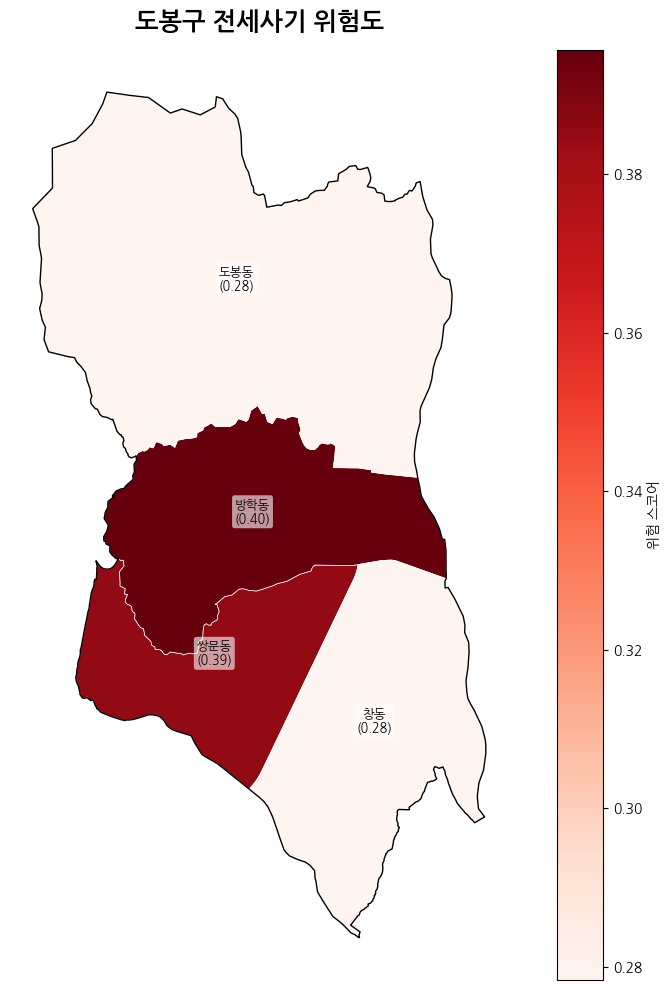

In [75]:
target_gu_name = '도봉구'

# 성북구 경계선 데이터
seongbuk_gu_boundary = seoul_gu_geo[seoul_gu_geo['SIG_KOR_NM'] == target_gu_name]

# 성북구 내의 '동' 데이터 (위험스코어 포함)
seongbuk_dongs_data = merged_gdf[merged_gdf['구'] == target_gu_name]


# 5. 시각화
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# 성북구 내의 동들을 위험스코어에 따라 채색
# 만약 risk_score 데이터에 없는 동이 있다면 'lightgrey'로 표시됨
seongbuk_dongs_data.plot(
    column='위험스코어',
    ax=ax,
    cmap='Reds',
    legend=True,
    edgecolor='white',
    linewidth=0.5,
    missing_kwds={
        "color": "lightgrey",
        "label": "데이터 없음"
    },
    legend_kwds={'label': "위험 스코어"}
)

# 성북구 외곽선 강조
seongbuk_gu_boundary.boundary.plot(ax=ax, color='black', linewidth=1)

# 각 동에 텍스트 라벨 추가
for idx, row in seongbuk_dongs_data.iterrows():
    centroid = row.geometry.centroid
    plt.text(
        centroid.x, centroid.y,
        f"{row['동']}\n({row['위험스코어']:.2f})",
        ha='center',
        fontsize=9,
        fontweight='medium',
        bbox=dict(facecolor='white', alpha=0.6, edgecolor='none', boxstyle='round,pad=0.2')
    )

ax.set_title(f'{target_gu_name} 전세사기 위험도', fontsize=18, fontweight='semibold', pad=15)
ax.set_axis_off() # 축 정보 숨기기
plt.tight_layout()
plt.show()